## Setting up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Select dataset
Opening this CSV file in Excel shows a row for each month (where 1 = January, 2 = February, etc) and a column for each airline code.

![Average flight delays dataset](https://i.imgur.com/5nYs9se.png)

Each entry shows the average arrival delay (in minutes) for a different airline and month (all in year 2015). Negative entries denote flights that (on average) tended to arrive early. For instance, the average American Airlines flight (airline code: AA) in January arrived roughly 7 minutes late, and the average Alaska Airlines flight (airline code: AS) in April arrived roughly 3 minutes early.

## Load data
In this case, since the row labels (from the 'Month' column) don't correspond to dates, we don't add parse_dates=True in the parentheses. But, we keep the first two pieces of text as before, to provide both:

- the filepath for the dataset (in this case, flight_filepath), and
- the name of the column that will be used to index the rows (in this case, index_col="Month").

In [2]:
# Path of the file to read
flight_filepath = "data/flight_delays.csv"

# Read the file into a variable flight_data
flight_data = pd.read_csv(flight_filepath, index_col="Month")

## Examine data

In [3]:
flight_data

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260


## Bar chart
Lets create a bar chart showing the average arrival delay for Spirit Airlines (airline code: NK) flights, by month.

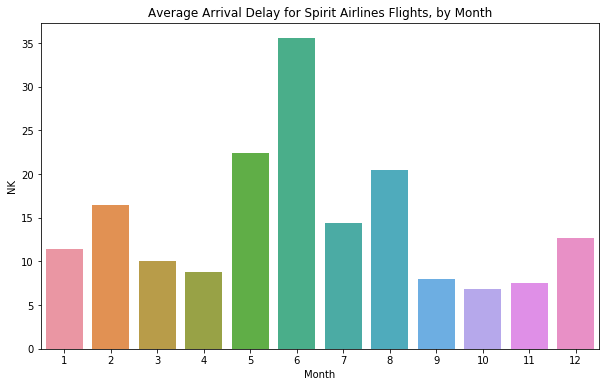

In [4]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])

#### Barchart customization:

__sns.barplot__ - This tells the notebook that we want to create a bar chart.
sns refers to the seaborn package, and all of the commands that you use to create charts in this course will start with this prefix.

__x=flight_data.index__ - This determines what to use on the horizontal axis. In this case, we have selected the column that indexes the rows (in this case, the column containing the months).

__y=flight_data['NK']__ - This sets the column in the data that will be used to determine the height of each bar. In this case, we select the 'NK' column.



__Note:__ We must select the indexing column with *flight_data.index*, and it is not possible to use *flight_data['Month']* (which will return an error). This is because when we loaded the dataset, the *"Month"* column was used to index the rows. We always have to use this special notation to select the indexing column.

## Heatmap

Now, lets create a heatmap to quickly visualize patterns in __flight_data__. Each cell is color-coded according to its corresponding value.

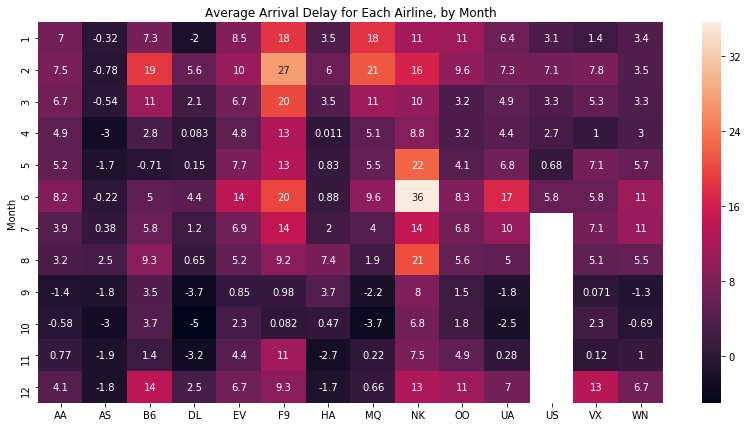

In [5]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Add label for horizontal axis
plt.xlabel("Airline")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)

The relevant code to create the heatmap is as follows:

This code has three main components:

- __sns.heatmap__ - This tells the notebook that we want to create a heatmap.
- __data=flight_data__ - This tells the notebook to use all of the entries in flight_data to create the heatmap.
- __annot=True__ - This ensures that the values for each cell appear on the chart. (Leaving this out removes the numbers from each of the cells!)

What patterns can you detect in the table? For instance, if you look closely, the months toward the end of the year (especially months 9-11) appear relatively dark for all airlines. This suggests that airlines are better (on average) at keeping schedule during these months!